# Introduction

This project focuses on analyzing data gathered from the popular online dating app OKCupid. The objective of this project is to define the scope, prepare, analyze, and develop a machine learning model to address a specific inquiry.

## Scoping

To guide the project process and ensure progress, the following four sections can be used:

- Project Goals: This section outlines the high-level objectives and intentions of the project.
- Data: Fortunately, data is already available for this project. Please refer to the data source "profiles.csv."
- Analysis: This section involves planning the analysis, selecting appropriate methods, and aligning the research questions with the project goals.
- Evaluation: This section aims to draw conclusions and generate findings from the analysis.

### Project Goals

The primary objective is to determine if an OkCupid user's astrological sign can be predicted using other variables from their profiles. This inquiry is significant because many users consider astrological signs a crucial aspect of matchmaking. In cases where users do not provide their sign, OkCupid intends to predict it accurately.

### Data

The project relies on a single dataset, profiles.csv, provided by Codecademy. The dataset comprises of rows representing OkCupid users, with columns containing their responses to profile questions, including both multiple-choice and short answer formats.

### Analysis

Descriptive statistics and data visualization techniques will be utilized to identify significant figures for understanding the distribution, count, and interrelationship between variables. Since the primary objective of the project is to predict user astrological signs, classification algorithms from the supervised learning family of machine learning models will be employed.

### Evaluation

The project will conclude with an evaluation of the selected machine learning model using a validation dataset. The output of the predictions can be assessed using a confusion matrix and metrics like accuracy, precision, recall, F1, and Kappa scores.

# Import library and load data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

profiles = pd.read_csv('profiles.csv')
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


# Explore data

In [2]:
profiles.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

## Check sign data

In [2]:
print(profiles.sign.nunique())
print(profiles.sign.unique())

48
['gemini' 'cancer' 'pisces but it doesn&rsquo;t matter' 'pisces'
 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'gemini but it doesn&rsquo;t matter' 'cancer but it doesn&rsquo;t matter'
 'leo but it doesn&rsquo;t matter' nan
 'aquarius but it doesn&rsquo;t matter'
 'aries and it&rsquo;s fun to think about'
 'libra but it doesn&rsquo;t matter'
 'pisces and it&rsquo;s fun to think about' 'libra'
 'taurus but it doesn&rsquo;t matter'
 'sagittarius but it doesn&rsquo;t matter' 'scorpio and it matters a lot'
 'gemini and it&rsquo;s fun to think about'
 'leo and it&rsquo;s fun to think about'
 'cancer and it&rsquo;s fun to think about'
 'libra and it&rsquo;s fun to think about'
 'aquarius and it&rsquo;s fun to think about'
 'virgo but it doesn&rsquo;t matter'
 'scorpio and it&rsquo;s fun to think about'
 'capricorn but it doesn&rsquo;t matter' 'scorpio'
 'capricorn and it&rsquo;s fun to think about' 'leo'
 'aries but it doesn&rsquo;t matter' 'aries'
 'scorpio but it doesn&rsquo;t matter'
 's

There should be 12 different signs in total. The current data in the "sign" column requires cleaning.

In [3]:
# Clean the labels for signs
profiles['signcleaned'] = profiles.sign.str.split().str.get(0)
print(profiles.signcleaned.nunique())
profiles.signcleaned.value_counts()

12


leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: signcleaned, dtype: int64

## Explore continuous variables

### Age

<AxesSubplot:xlabel='age', ylabel='Count'>

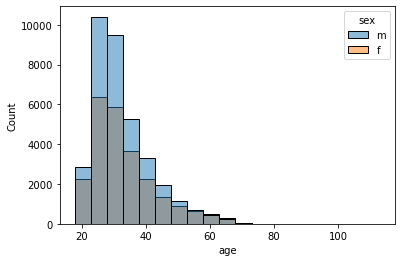

In [6]:
sns.histplot(data = profiles, x = 'age', hue = 'sex', binwidth = 5)

### Height

<AxesSubplot:xlabel='height', ylabel='Count'>

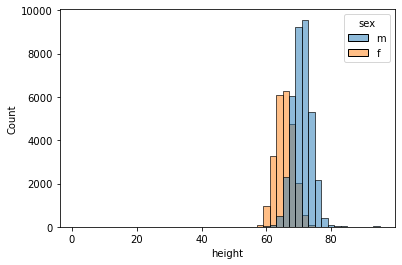

In [7]:
sns.histplot(data = profiles, x = 'height', hue = 'sex', binwidth = 2)

### Income

<AxesSubplot:xlabel='income', ylabel='Count'>

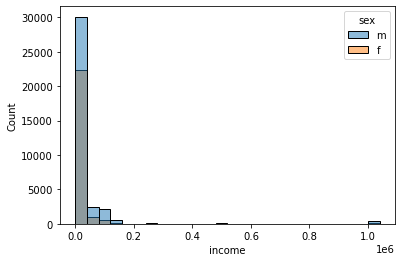

In [8]:
sns.histplot(data = profiles, x = 'income', hue = 'sex', binwidth = 40000)

## Discrete variables

### Sex

<AxesSubplot:xlabel='sex', ylabel='count'>

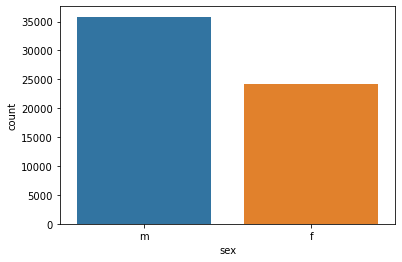

In [9]:
sns.countplot(data = profiles, x = 'sex')

### Body type

<AxesSubplot:xlabel='count', ylabel='body_type'>

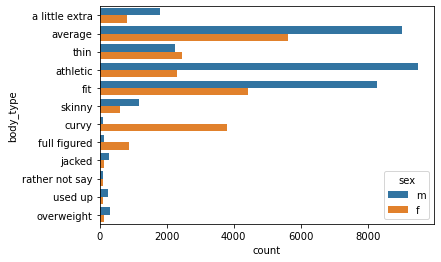

In [10]:
sns.countplot(data = profiles, y = 'body_type', hue = 'sex')

### Diet

<AxesSubplot:xlabel='count', ylabel='diet'>

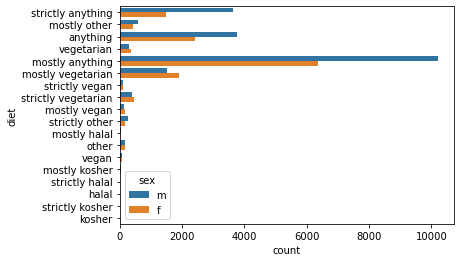

In [11]:
sns.countplot(data = profiles, y = 'diet', hue = 'sex')

### Drinks

<AxesSubplot:xlabel='count', ylabel='drinks'>

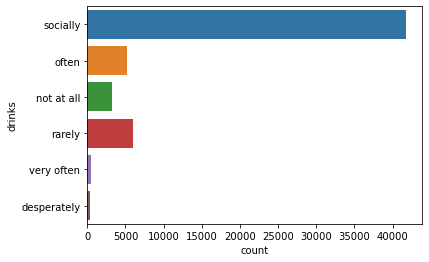

In [12]:
sns.countplot(data=profiles, y="drinks")

### Drugs

<AxesSubplot:xlabel='count', ylabel='drugs'>

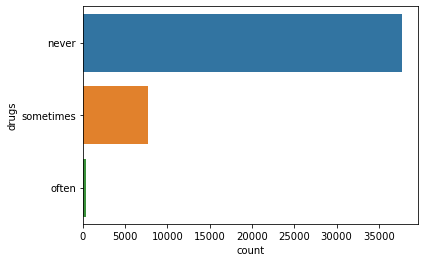

In [13]:
sns.countplot(data=profiles, y="drugs")

### Education

<AxesSubplot:xlabel='count', ylabel='education'>

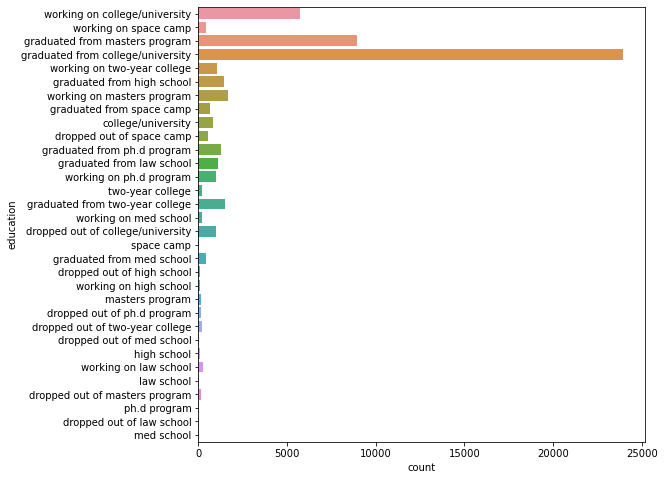

In [14]:
plt.figure(figsize = (8, 8))
sns.countplot(data=profiles, y="education")

### Offspring

<AxesSubplot:xlabel='count', ylabel='offspring'>

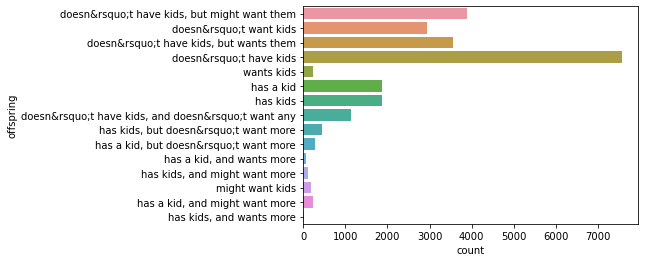

In [15]:
sns.countplot(data=profiles, y="offspring")

### Orientation

<AxesSubplot:xlabel='count', ylabel='orientation'>

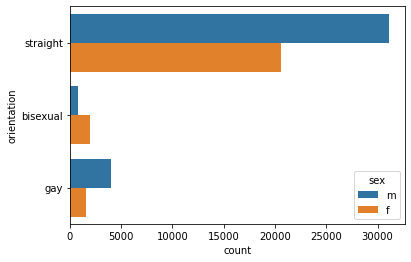

In [16]:
sns.countplot(data=profiles, y="orientation", hue = 'sex')

### Pets

<AxesSubplot:xlabel='count', ylabel='pets'>

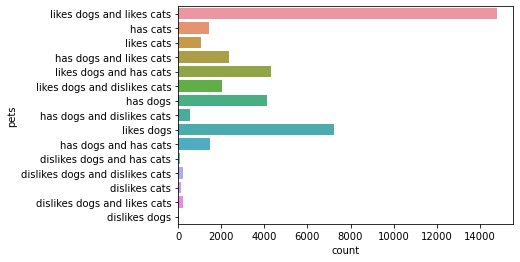

In [17]:
sns.countplot(data=profiles, y="pets")

### Religion

<AxesSubplot:xlabel='count', ylabel='religion'>

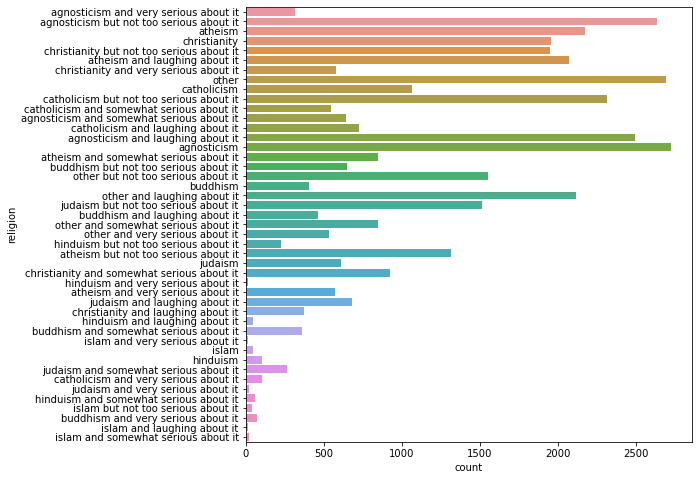

In [18]:
plt.figure(figsize = (8, 8))
sns.countplot(data=profiles, y="religion")

Similar to signs, data in the "religion" column requires cleaning to provide more insights on the distritbution of religions among users.

<AxesSubplot:xlabel='count', ylabel='religioncleaned'>

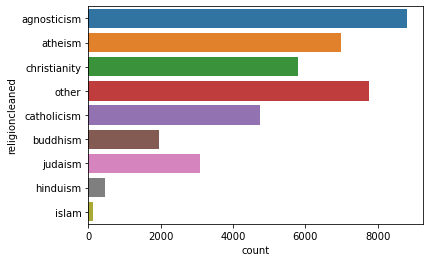

In [19]:
profiles['religioncleaned'] = profiles.religion.str.split().str.get(0)
sns.countplot(data=profiles, y="religioncleaned")

### Signs

<AxesSubplot:xlabel='count', ylabel='signcleaned'>

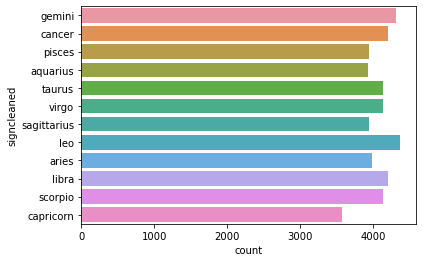

In [20]:
sns.countplot(data=profiles, y="signcleaned")

### Smokes

<AxesSubplot:xlabel='count', ylabel='smokes'>

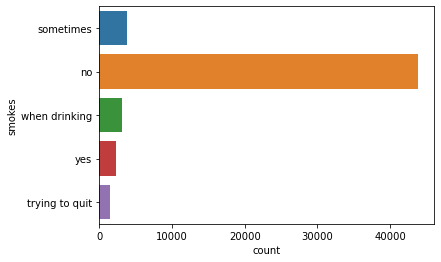

In [21]:
sns.countplot(data=profiles, y="smokes")

### Status

<AxesSubplot:xlabel='count', ylabel='status'>

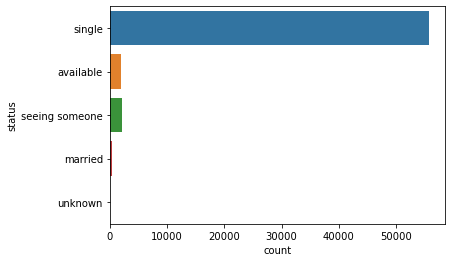

In [22]:
sns.countplot(data=profiles, y="status")

# Data Preparation

In [23]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              59946 non-null  int64  
 1   body_type        54650 non-null  object 
 2   diet             35551 non-null  object 
 3   drinks           56961 non-null  object 
 4   drugs            45866 non-null  object 
 5   education        53318 non-null  object 
 6   essay0           54458 non-null  object 
 7   essay1           52374 non-null  object 
 8   essay2           50308 non-null  object 
 9   essay3           48470 non-null  object 
 10  essay4           49409 non-null  object 
 11  essay5           49096 non-null  object 
 12  essay6           46175 non-null  object 
 13  essay7           47495 non-null  object 
 14  essay8           40721 non-null  object 
 15  essay9           47343 non-null  object 
 16  ethnicity        54266 non-null  object 
 17  height      

Select several columns with discrete variables and drop the data with "NAN."

In [24]:
cols = ['body_type', 'diet', 'orientation', 'pets', 'religioncleaned', 'sex', 'job', 'signcleaned']
selected_profiles = profiles[cols].dropna()
selected_profiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16453 entries, 0 to 59944
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   body_type        16453 non-null  object
 1   diet             16453 non-null  object
 2   orientation      16453 non-null  object
 3   pets             16453 non-null  object
 4   religioncleaned  16453 non-null  object
 5   sex              16453 non-null  object
 6   job              16453 non-null  object
 7   signcleaned      16453 non-null  object
dtypes: object(8)
memory usage: 1.1+ MB


## Get dummies

In [25]:
new_profiles = pd.get_dummies(selected_profiles, columns=['body_type', 'diet', 'orientation', 'pets', 'religioncleaned', 'sex', 'job'])
new_profiles.head()

,signcleaned,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,...,job_military,job_other,job_political / government,job_rather not say,job_retired,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed
0,gemini,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,cancer,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,taurus,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,sagittarius,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,cancer,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Splitting the data (for training and testing)

In [26]:
X = new_profiles.iloc[:, 1:len(new_profiles.columns)]
Y = new_profiles.iloc[:, 0:1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Prediction

We will test three prediction models: logistic regression, k nearest neighbors, and decision trees for prediction.

## Logistic regression

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_prediction = lr.predict(x_train)

from sklearn.metrics import classification_report
print(classification_report(y_train, lr_prediction))

              precision    recall  f1-score   support

    aquarius       0.12      0.08      0.09      1031
       aries       0.11      0.08      0.10      1043
      cancer       0.13      0.22      0.16      1190
   capricorn       0.12      0.04      0.06       952
      gemini       0.12      0.13      0.12      1200
         leo       0.12      0.20      0.15      1208
       libra       0.12      0.09      0.11      1090
      pisces       0.11      0.07      0.09      1059
 sagittarius       0.13      0.10      0.12      1051
     scorpio       0.13      0.05      0.07      1072
      taurus       0.13      0.12      0.12      1102
       virgo       0.12      0.22      0.16      1164

    accuracy                           0.12     13162
   macro avg       0.12      0.12      0.11     13162
weighted avg       0.12      0.12      0.11     13162



The final accuracy of the logistic regression model is 12% which is terrible considering a random guess should result in being correct ~8% of the time (1/12).

## K nearest neighbor

In [28]:
from sklearn.neighbors import KNeighborsClassifier
kclassifier = KNeighborsClassifier()
kclassifier.fit(x_train, y_train)
k_prediction = kclassifier.predict(x_train)
print(classification_report(y_train, k_prediction))

              precision    recall  f1-score   support

    aquarius       0.26      0.66      0.37      1031
       aries       0.27      0.53      0.36      1043
      cancer       0.30      0.43      0.35      1190
   capricorn       0.31      0.33      0.32       952
      gemini       0.35      0.30      0.32      1200
         leo       0.40      0.28      0.33      1208
       libra       0.37      0.27      0.31      1090
      pisces       0.41      0.24      0.31      1059
 sagittarius       0.41      0.21      0.28      1051
     scorpio       0.41      0.23      0.30      1072
      taurus       0.41      0.23      0.29      1102
       virgo       0.41      0.26      0.32      1164

    accuracy                           0.33     13162
   macro avg       0.36      0.33      0.32     13162
weighted avg       0.36      0.33      0.32     13162



This model has a 36% accuracy, which is better than the logistic regression model.

## Decision tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt_prediction = dt.predict(x_train)
print(classification_report(y_train, dt_prediction))

              precision    recall  f1-score   support

    aquarius       0.66      0.94      0.78      1031
       aries       0.66      0.87      0.75      1043
      cancer       0.69      0.85      0.77      1190
   capricorn       0.74      0.83      0.78       952
      gemini       0.78      0.79      0.78      1200
         leo       0.79      0.80      0.79      1208
       libra       0.78      0.76      0.77      1090
      pisces       0.82      0.73      0.77      1059
 sagittarius       0.91      0.69      0.78      1051
     scorpio       0.87      0.71      0.78      1072
      taurus       0.92      0.70      0.79      1102
       virgo       0.91      0.67      0.77      1164

    accuracy                           0.78     13162
   macro avg       0.79      0.78      0.78     13162
weighted avg       0.80      0.78      0.78     13162



This model has very high accurarcy (78%), making it the most ideal model among the three.

### Confusion matrix for the decision tree model

[Text(0, 0.5, 'aquarius'),
 Text(0, 1.5, 'aries'),
 Text(0, 2.5, 'cancer'),
 Text(0, 3.5, 'capricorn'),
 Text(0, 4.5, 'gemini'),
 Text(0, 5.5, 'leo'),
 Text(0, 6.5, 'libra'),
 Text(0, 7.5, 'pisces'),
 Text(0, 8.5, 'sagittarius'),
 Text(0, 9.5, 'scorpio'),
 Text(0, 10.5, 'taurus'),
 Text(0, 11.5, 'virgo')]

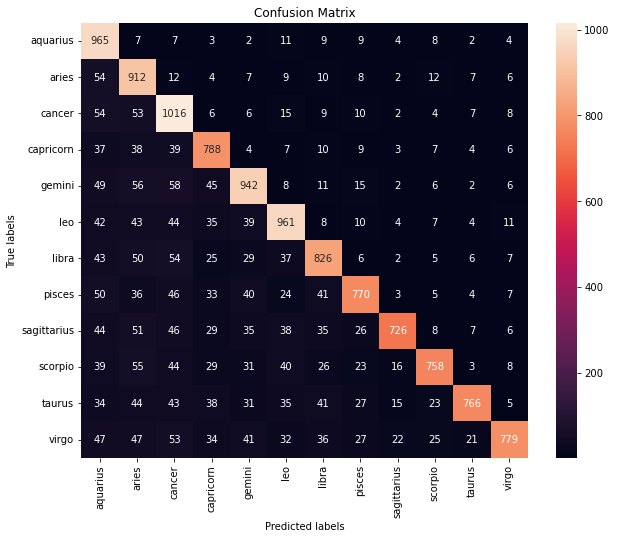

In [30]:
# confusion matrix for decision tree model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, dt_prediction)
dt_labels = dt.classes_

# heat map
plt.figure(figsize = (10, 8))
ax = plt.subplot()

sns.heatmap(cm, annot=True, fmt = 'd')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(dt_labels)
ax.yaxis.set_ticklabels(dt_labels)

In [31]:
dt.get_depth()

58

This tree model has a depth of 58 branches, which will probably not generalize to another dataset. In this case this model has been "overfit" for this data.

In [32]:
dt_20 = DecisionTreeClassifier(max_depth = 20)
dt_20.fit(x_train, y_train)
dt_20prediction = dt_20.predict(x_train)
print(classification_report(y_train, dt_20prediction))

              precision    recall  f1-score   support

    aquarius       0.46      0.39      0.42      1031
       aries       0.57      0.38      0.46      1043
      cancer       0.42      0.42      0.42      1190
   capricorn       0.55      0.37      0.44       952
      gemini       0.27      0.49      0.35      1200
         leo       0.31      0.50      0.38      1208
       libra       0.37      0.33      0.35      1090
      pisces       0.39      0.34      0.36      1059
 sagittarius       0.50      0.34      0.40      1051
     scorpio       0.34      0.35      0.34      1072
      taurus       0.42      0.34      0.37      1102
       virgo       0.37      0.33      0.35      1164

    accuracy                           0.38     13162
   macro avg       0.41      0.38      0.39     13162
weighted avg       0.41      0.38      0.39     13162



The decision tree model will be made it again, but with a max_depth of 20 to stop the algorithm from reaching the stopping point. The new accuracy rate of ~41% is worse than the first iteration, but slightly better than the KNN model.

## final KNN model

In [37]:
knn_predictions = kclassifier.predict(x_test) 
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

    aquarius       0.07      0.21      0.11       231
       aries       0.08      0.14      0.10       285
      cancer       0.09      0.15      0.11       267
   capricorn       0.06      0.07      0.06       245
      gemini       0.09      0.07      0.08       296
         leo       0.10      0.07      0.08       308
       libra       0.06      0.05      0.05       264
      pisces       0.06      0.03      0.04       275
 sagittarius       0.10      0.05      0.07       261
     scorpio       0.08      0.04      0.06       284
      taurus       0.05      0.03      0.04       288
       virgo       0.08      0.05      0.06       287

    accuracy                           0.08      3291
   macro avg       0.08      0.08      0.07      3291
weighted avg       0.08      0.08      0.07      3291



[Text(0, 0.5, 'aquarius'),
 Text(0, 1.5, 'aries'),
 Text(0, 2.5, 'cancer'),
 Text(0, 3.5, 'capricorn'),
 Text(0, 4.5, 'gemini'),
 Text(0, 5.5, 'leo'),
 Text(0, 6.5, 'libra'),
 Text(0, 7.5, 'pisces'),
 Text(0, 8.5, 'sagittarius'),
 Text(0, 9.5, 'scorpio'),
 Text(0, 10.5, 'taurus'),
 Text(0, 11.5, 'virgo')]

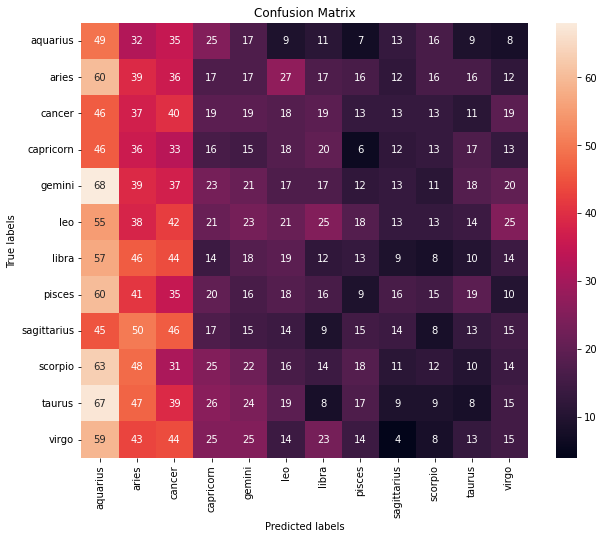

In [39]:
final_cm = confusion_matrix(y_test, knn_predictions)
knn_labels = kclassifier.classes_

plt.figure(figsize=(10,8))

ax= plt.subplot()
sns.heatmap(final_cm, annot=True, ax = ax, fmt="d")

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(knn_labels) 
ax.yaxis.set_ticklabels(knn_labels)

In the confusion matrix, it becomes clear that Cancer, Gemini, Leo, and Virgo was predicted most often, but was not super accurate since the vertical color band represents even distributed guesses mostly wrong and some correct.

# Conclusion

The project employed machine learning to forecast the astrological signs of OkCupid users, which is a crucial feature considering the significance of astrology and compatibility of star signs in matchmaking. In cases where users do not provide their signs, an algorithmic solution could generate a sign to fill in the missing data to facilitate matchmaking.

However, the selected algorithm's final output was no better than random guessing, indicating that the project did not achieve the desired outcome.